# Spotify Project

In [1]:
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

## Building an Audio Features Dataframe of Several Playlists

1 Playlists:
- id: 37i9dQZF1DWXx3Txis2L4x

In [2]:
# Connecting API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [3]:
# sp.available_markets() ---> To know the avalilable markets in spotify 

In [4]:
# Extracting json file from a playlist
playlist = sp.user_playlist_tracks("spotify", "37i9dQZF1DWXx3Txis2L4x",market="GB")

In [5]:
type(playlist)

dict

In [6]:
# Checking the structure of the json file
import pprint
pprint.pprint(playlist)

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWXx3Txis2L4x/tracks?offset=0&limit=100&market=GB&additional_types=track',
 'items': [{'added_at': '2023-03-07T16:54:09Z',
            'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
                         'href': 'https://api.spotify.com/v1/users/',
                         'id': '',
                         'type': 'user',
                         'uri': 'spotify:user:'},
            'is_local': False,
            'primary_color': None,
            'track': {'album': {'album_group': 'album',
                                'album_type': 'album',
                                'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2qk9voo8llSGYcZ6xrBzKx'},
                                             'href': 'https://api.spotify.com/v1/artists/2qk9voo8llSGYcZ6xrBzKx',
                                             'id': '2qk9voo8llSGYcZ6xrBzKx',
                                   

In [7]:
# Checking the total number of songs
print(list(playlist.keys())) # Let's look at items and total:
print("Total number of songs in the playlist: ",playlist["total"]) #  Let's check items:
len(playlist["items"]) # It is less than 100 tracks

['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
Total number of songs in the playlist:  60


60

In [8]:
# Defining a function that extracts the Id of the songs embebed in a playlist
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [9]:
tracks=get_playlist_tracks('spotify','37i9dQZF1DWXx3Txis2L4x')
tracks # getting a list with the info of the tracks

[{'added_at': '2023-03-07T16:54:09Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2qk9voo8llSGYcZ6xrBzKx'},
      'href': 'https://api.spotify.com/v1/artists/2qk9voo8llSGYcZ6xrBzKx',
      'id': '2qk9voo8llSGYcZ6xrBzKx',
      'name': 'Kings of Leon',
      'type': 'artist',
      'uri': 'spotify:artist:2qk9voo8llSGYcZ6xrBzKx'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/5CZR6ljD0x9fTiS4mh9wMp'},
    'href': 'https://api.spotify.com/v1/albums/5CZR6ljD0x9fTiS4mh9wMp',
    'id': '5CZR6ljD0x9fTiS4mh9wMp',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b2732519d01c0cca06f134eeadd8',
      'width': 6

In [10]:
# Extracting the audio_features of a track
sp.audio_features(tracks[0]["track"]["id"])

[{'danceability': 0.542,
  'energy': 0.905,
  'key': 9,
  'loudness': -5.653,
  'mode': 1,
  'speechiness': 0.054,
  'acousticness': 0.00172,
  'instrumentalness': 0.0104,
  'liveness': 0.136,
  'valence': 0.374,
  'tempo': 153.398,
  'type': 'audio_features',
  'id': '5A1FmxbYVRZKy4nc16MAue',
  'uri': 'spotify:track:5A1FmxbYVRZKy4nc16MAue',
  'track_href': 'https://api.spotify.com/v1/tracks/5A1FmxbYVRZKy4nc16MAue',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5A1FmxbYVRZKy4nc16MAue',
  'duration_ms': 203347,
  'time_signature': 4}]

In [11]:
tracks[0]

{'added_at': '2023-03-07T16:54:09Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
  'href': 'https://api.spotify.com/v1/users/',
  'id': '',
  'type': 'user',
  'uri': 'spotify:user:'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2qk9voo8llSGYcZ6xrBzKx'},
     'href': 'https://api.spotify.com/v1/artists/2qk9voo8llSGYcZ6xrBzKx',
     'id': '2qk9voo8llSGYcZ6xrBzKx',
     'name': 'Kings of Leon',
     'type': 'artist',
     'uri': 'spotify:artist:2qk9voo8llSGYcZ6xrBzKx'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/5CZR6ljD0x9fTiS4mh9wMp'},
   'href': 'https://api.spotify.com/v1/albums/5CZR6ljD0x9fTiS4mh9wMp',
   'id': '5CZR6ljD0x9fTiS4mh9wMp',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b2732519d01c0cca06f134eeadd8',
     'width': 640},
    {'height': 30

In [12]:
# Creating a list of features with the features of all tracks in the playlist
list_of_audio_features = []
for item in range(0,60):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks[item]["track"]["id"])[0])

In [13]:
list_of_audio_features

[{'danceability': 0.542,
  'energy': 0.905,
  'key': 9,
  'loudness': -5.653,
  'mode': 1,
  'speechiness': 0.054,
  'acousticness': 0.00172,
  'instrumentalness': 0.0104,
  'liveness': 0.136,
  'valence': 0.374,
  'tempo': 153.398,
  'type': 'audio_features',
  'id': '5A1FmxbYVRZKy4nc16MAue',
  'uri': 'spotify:track:5A1FmxbYVRZKy4nc16MAue',
  'track_href': 'https://api.spotify.com/v1/tracks/5A1FmxbYVRZKy4nc16MAue',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5A1FmxbYVRZKy4nc16MAue',
  'duration_ms': 203347,
  'time_signature': 4},
 {'danceability': 0.643,
  'energy': 0.849,
  'key': 2,
  'loudness': -5.428,
  'mode': 1,
  'speechiness': 0.0526,
  'acousticness': 0.0371,
  'instrumentalness': 0,
  'liveness': 0.058,
  'valence': 0.903,
  'tempo': 162.152,
  'type': 'audio_features',
  'id': '6GG73Jik4jUlQCkKg9JuGO',
  'uri': 'spotify:track:6GG73Jik4jUlQCkKg9JuGO',
  'track_href': 'https://api.spotify.com/v1/tracks/6GG73Jik4jUlQCkKg9JuGO',
  'analysis_url': 'https://api

In [14]:
import pandas as pd
#df=pd.DataFrame(list_of_audio_features)
#df

In [15]:
#df=df[["danceability","energy","loudness","speechiness","acousticness",
#    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
#df

Second Playlist
- 37i9dQZF1E38BmgRMo6ZRD

In [16]:
playlist2 = sp.user_playlist_tracks("spotify", "37i9dQZF1E38BmgRMo6ZRD",market="GB")

In [17]:
print(list(playlist2.keys())) # Let's look at items and total:
print("Total number of songs in the playlist: ",playlist2["total"]) #  Let's check items:
len(playlist2["items"]) # It is less than 100 tracks

['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
Total number of songs in the playlist:  50


50

In [18]:
tracks2=get_playlist_tracks('spotify','37i9dQZF1E38BmgRMo6ZRD')

In [19]:
for item in range(0,50):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks[item]["track"]["id"])[0])

In [20]:
len(list_of_audio_features)

110

Third Playlist
- 37i9dQZF1DWW2mn5wEfG6q

In [21]:
playlist3 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWW2mn5wEfG6q",market="GB")

In [22]:
print(list(playlist3.keys())) # Let's look at items and total:
print("Total number of songs in the playlist: ",playlist3["total"]) #  Let's check items:
len(playlist3["items"]) # It is less than 100 tracks

['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
Total number of songs in the playlist:  100


100

In [23]:
tracks3=get_playlist_tracks('spotify','37i9dQZF1DWW2mn5wEfG6q')

In [24]:
for item in range(0,100):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks3[item]["track"]["id"])[0])

In [25]:
len(list_of_audio_features)

210

Fourth Playlist
- 37i9dQZF1DWSf2RDTDayIx

In [26]:
playlist4 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWSf2RDTDayIx",market="GB")

In [27]:
print(list(playlist4.keys())) # Let's look at items and total:
print("Total number of songs in the playlist: ",playlist4["total"]) #  Let's check items:
len(playlist4["items"]) # It is less than 100 tracks

['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
Total number of songs in the playlist:  150


100

In [28]:
tracks4=get_playlist_tracks('spotify','37i9dQZF1DWSf2RDTDayIx')

In [29]:

for item in range(0,150):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks4[item]["track"]["id"])[0])

In [30]:
len(list_of_audio_features)

360

Fifth Playlist
- 37i9dQZF1DZ06evO3YvhXa

In [31]:
playlist5 = sp.user_playlist_tracks("spotify", "37i9dQZF1DZ06evO3YvhXa",market="GB")

In [32]:
print("Total number of songs in the playlist: ",playlist5["total"]) #  Let's check items:

Total number of songs in the playlist:  50


In [33]:
tracks5=get_playlist_tracks('spotify','37i9dQZF1DZ06evO3YvhXa')

In [34]:
for item in range(0,50):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks5[item]["track"]["id"])[0])

In [35]:
len(list_of_audio_features)

410

Sixth Playlist
- 37i9dQZF1DWWGFQLoP9qlv

In [36]:
playlist6 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWWGFQLoP9qlv",market="GB")

In [37]:
print("Total number of songs in the playlist: ",playlist6["total"]) #  Let's check items:

Total number of songs in the playlist:  70


In [38]:
tracks6=get_playlist_tracks('spotify','37i9dQZF1DWWGFQLoP9qlv')

In [39]:
len(tracks6)

70

In [40]:
for item in range(0,len(tracks6)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks6[item]["track"]["id"])[0])

In [41]:
len(list_of_audio_features)

480

Seventh Plalits
- 0kYamsuIJKy5pzZ8hBeZRo

In [42]:
playlist7 = sp.user_playlist_tracks("spotify", "0kYamsuIJKy5pzZ8hBeZRo",market="GB")

In [43]:
tracks7=get_playlist_tracks('spotify','0kYamsuIJKy5pzZ8hBeZRo')

In [44]:
len(tracks7)

75

In [45]:
for item in range(0,len(tracks7)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks7[item]["track"]["id"])[0])

In [46]:
len(list_of_audio_features)

555

Eight Playlist
- 37i9dQZF1DX1rVvRgjX59F

In [47]:
playlist8 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX1rVvRgjX59F",market="GB")

In [48]:
tracks8=get_playlist_tracks('spotify','37i9dQZF1DX1rVvRgjX59F')

In [49]:
len(tracks8)

100

In [50]:
for item in range(0,len(tracks8)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks8[item]["track"]["id"])[0])

In [51]:
len(list_of_audio_features)

655

Nineth Playlist
- 37i9dQZF1E4mgsZiEhZpow

In [52]:
playlist9 = sp.user_playlist_tracks("spotify", "37i9dQZF1E4mgsZiEhZpow",market="GB")

In [53]:
tracks9=get_playlist_tracks('spotify','37i9dQZF1E4mgsZiEhZpow')

In [54]:
len(tracks9)

50

In [55]:
for item in range(0,len(tracks9)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks9[item]["track"]["id"])[0])

In [56]:
len(list_of_audio_features)

705

Tenth Playlist
- 37i9dQZF1DX9wC1KY45plY

In [57]:
playlist10 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX9wC1KY45plY",market="GB")

In [58]:
tracks10=get_playlist_tracks('spotify','37i9dQZF1DX9wC1KY45plY')

In [59]:
len(tracks10)

100

In [60]:
for item in range(0,len(tracks10)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks10[item]["track"]["id"])[0])

In [61]:
len(list_of_audio_features)

805

Eleventh Playlist
- 37i9dQZF1EQp62d3Dl7ECY

In [62]:
playlist11 = sp.user_playlist_tracks("spotify", "37i9dQZF1EQp62d3Dl7ECY",market="GB")

In [63]:
tracks11=get_playlist_tracks('spotify','37i9dQZF1EQp62d3Dl7ECY')

In [64]:
len(tracks11)

50

In [65]:
for item in range(0,len(tracks11)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks11[item]["track"]["id"])[0])

In [66]:
len(list_of_audio_features)

855

Twelve Playlist
- 37i9dQZF1DX70RN3TfWWJh

In [67]:
playlist12 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX70RN3TfWWJh",market="GB")

In [68]:
tracks12=get_playlist_tracks('spotify','37i9dQZF1DX70RN3TfWWJh')

In [69]:
len(tracks12)

100

In [70]:
for item in range(0,len(tracks12)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks12[item]["track"]["id"])[0])

In [71]:
len(list_of_audio_features)

955

13 Playlist
- 2HjLm7sH7dALboqWUHNU8p

In [72]:
playlist13 = sp.user_playlist_tracks("spotify", "2HjLm7sH7dALboqWUHNU8p",market="GB")

In [73]:
tracks13=get_playlist_tracks('spotify','2HjLm7sH7dALboqWUHNU8p')

In [74]:
len(tracks13)

46

In [75]:
for item in range(0,len(tracks13)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks13[item]["track"]["id"])[0])

In [76]:
len(list_of_audio_features)

1001

14 Playlist
- 7Kj3xNBseisrKdTuAvdggT

In [77]:
playlist14 = sp.user_playlist_tracks("spotify", "7Kj3xNBseisrKdTuAvdggT",market="GB")

In [78]:
tracks14=get_playlist_tracks('spotify','7Kj3xNBseisrKdTuAvdggT')

In [79]:
len(tracks14)

356

In [80]:
for item in range(0,len(tracks14)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks14[item]["track"]["id"])[0])

In [81]:
len(list_of_audio_features)

1357

15 Playlist
- 6JWfolQkK4MFe12omnim5D

In [82]:
playlist15 = sp.user_playlist_tracks("spotify", "6JWfolQkK4MFe12omnim5D",market="GB")

In [83]:
tracks15=get_playlist_tracks('spotify','6JWfolQkK4MFe12omnim5D')

In [84]:
len(tracks15)

113

In [85]:
for item in range(0,len(tracks15)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks15[item]["track"]["id"])[0])

In [86]:
len(list_of_audio_features)

1470

16 Playlist
- 37i9dQZF1DX36edUJpD76c

In [87]:
playlist16 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX36edUJpD76c",market="GB")

In [88]:
tracks16=get_playlist_tracks('spotify','37i9dQZF1DX36edUJpD76c')

In [89]:
len(tracks16)

50

In [90]:
for item in range(0,len(tracks16)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks16[item]["track"]["id"])[0])

In [91]:
len(list_of_audio_features)

1520

17 Playlist
- 37i9dQZF1DX0gbcr80GO9l

In [92]:
playlist17 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX0gbcr80GO9l",market="GB")

In [93]:
tracks17=get_playlist_tracks('spotify','37i9dQZF1DX0gbcr80GO9l')

In [94]:
len(tracks17)

80

In [95]:
for item in range(0,len(tracks17)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks17[item]["track"]["id"])[0])

In [96]:
len(list_of_audio_features)

1600

18 Playlist
- 37i9dQZF1DX5Vy6DFOcx00

In [97]:
playlist18 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX5Vy6DFOcx00",market="GB")

In [98]:
tracks18=get_playlist_tracks('spotify','37i9dQZF1DX5Vy6DFOcx00')

In [99]:
len(tracks18)

121

In [100]:
for item in range(0,len(tracks18)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks18[item]["track"]["id"])[0])

In [101]:
len(list_of_audio_features)

1721

19 Playlist
- 37i9dQZF1DXchMhcG0ua22

In [102]:
playlist19 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXchMhcG0ua22",market="GB")

In [103]:
tracks19=get_playlist_tracks('spotify','37i9dQZF1DXchMhcG0ua22')

In [104]:
len(tracks19)

66

In [105]:
for item in range(0,len(tracks19)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks19[item]["track"]["id"])[0])

In [106]:
len(list_of_audio_features)

1787

20 Playlist
- 37i9dQZF1DWTcqUzwhNmKv

In [107]:
playlist20 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWTcqUzwhNmKv",market="GB")

In [108]:
tracks20=get_playlist_tracks('spotify','37i9dQZF1DWTcqUzwhNmKv')

In [109]:
len(tracks20)

76

In [110]:
for item in range(0,len(tracks20)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks20[item]["track"]["id"])[0])

In [111]:
len(list_of_audio_features)

1863

21 Playlist
- 37i9dQZF1DWY5ai7gxfuaS

In [112]:
playlist21 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWY5ai7gxfuaS",market="GB")

In [113]:
tracks21=get_playlist_tracks('spotify','37i9dQZF1DWY5ai7gxfuaS')

In [114]:
len(tracks21)

80

In [115]:
for item in range(0,len(tracks21)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks21[item]["track"]["id"])[0])

In [116]:
len(list_of_audio_features)

1943

22 Playlist
- 37i9dQZF1DX2ogDiL6nZJr

In [117]:
playlist22 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX2ogDiL6nZJr",market="GB")

In [118]:
tracks22=get_playlist_tracks('spotify','37i9dQZF1DX2ogDiL6nZJr')

In [119]:
len(tracks22)

100

In [120]:
for item in range(0,len(tracks22)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks22[item]["track"]["id"])[0])

In [121]:
len(list_of_audio_features)

2043

23 Playlist
- 37i9dQZF1DX6eyIKoZCdug

In [122]:
playlist23 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX6eyIKoZCdug",market="GB")

In [123]:
tracks23=get_playlist_tracks('spotify','37i9dQZF1DX6eyIKoZCdug')

In [124]:
len(tracks23)

50

In [125]:
for item in range(0,len(tracks23)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks23[item]["track"]["id"])[0])

In [126]:
len(list_of_audio_features)

2093

24 Playlist

In [127]:
playlist24_id = "37i9dQZF1DWVyizF9BJ61m"

In [128]:
playlist24 = sp.user_playlist_tracks("spotify", playlist24_id,market="GB")

In [129]:
tracks24=get_playlist_tracks('spotify',playlist24_id)

In [130]:
len(tracks24)

50

In [131]:
for item in range(0,len(tracks24)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks24[item]["track"]["id"])[0])

In [132]:
len(list_of_audio_features)

2143

25 Playlist

In [133]:
playlist25_id = "37i9dQZF1DZ06evO4nBpII"

In [134]:
playlist25 = sp.user_playlist_tracks("spotify", playlist25_id,market="GB")

In [135]:
tracks25=get_playlist_tracks('spotify',playlist25_id)

In [136]:
len(tracks25)

50

In [137]:
for item in range(0,len(tracks25)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks25[item]["track"]["id"])[0])

In [138]:
len(list_of_audio_features)

2193

26 Playlist

In [139]:
playlist26_id = "37i9dQZF1DXasneILDRM7B"

In [140]:
playlist26 = sp.user_playlist_tracks("spotify", playlist26_id,market="GB")

In [141]:
tracks26=get_playlist_tracks('spotify',playlist26_id)

In [142]:
len(tracks26)

100

In [143]:
for item in range(0,len(tracks26)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks26[item]["track"]["id"])[0])

In [144]:
len(list_of_audio_features)

2293

27 Playlist

In [145]:
playlist27_id = "37i9dQZF1DWT7XSlwvR1ar"


In [146]:
playlist27 = sp.user_playlist_tracks("spotify", playlist27_id,market="GB")


In [147]:
tracks27=get_playlist_tracks('spotify',playlist27_id)


In [148]:
len(tracks27)


100

In [149]:
for item in range(0,len(tracks27)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks27[item]["track"]["id"])[0])
    

In [150]:
len(list_of_audio_features)


2393

28 Playlist

In [151]:
playlist28_id = "37i9dQZF1DWZIOAPKUdaKS"

In [152]:
playlist28 = sp.user_playlist_tracks("spotify", playlist28_id,market="GB")

In [153]:
tracks28=get_playlist_tracks('spotify',playlist28_id)

In [154]:
len(tracks28)

322

In [155]:
for item in range(0,len(tracks28)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks28[item]["track"]["id"])[0])

In [156]:
len(list_of_audio_features)

2715

29 Playlist

In [157]:
playlist29_id = "37i9dQZF1DWT5lkChsPmpy"

In [158]:
playlist29 = sp.user_playlist_tracks("spotify", playlist29_id,market="GB")

In [159]:
tracks29=get_playlist_tracks('spotify',playlist29_id)

In [160]:
len(tracks29)

236

In [161]:
for item in range(0,len(tracks29)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks29[item]["track"]["id"])[0])

In [162]:
len(list_of_audio_features)

2951

### Song Collection Data Frame

In [163]:
# Converting the list_of_audio_features into a Data Frame and selecting only the columns related to the audio features
df=pd.DataFrame(list_of_audio_features)
df=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df

danceability  energy  loudness  speechiness  acousticness  \
0            0.542   0.905    -5.653       0.0540      0.001720   
1            0.643   0.849    -5.428       0.0526      0.037100   
2            0.579   0.558    -6.986       0.0895      0.020200   
3            0.489   0.649    -5.110       0.0336      0.000603   
4            0.426   0.888    -3.720       0.0987      0.000455   
...            ...     ...       ...          ...           ...   
2946         0.744   0.141   -19.627       0.0603      0.469000   
2947         0.792   0.342   -12.032       0.0329      0.088600   
2948         0.661   0.209   -19.632       0.0398      0.434000   
2949         0.560   0.359   -14.593       0.0288      0.061700   
2950         0.755   0.220   -15.257       0.2360      0.181000   

      instrumentalness  liveness  valence    tempo                      id  \
0             0.010400     0.136   0.3740  153.398  5A1FmxbYVRZKy4nc16MAue   
1             0.000000     0.058   0.9030  162.152  6GG73Jik4jUlQCkKg9JuGO   
2             0.000001     0.212   0.5060  179.949  7nzsY8vlnKdvGOEE0rjAXZ   
3             0.713000     0.101   0.7700  158.009  57Xjny5yNzAcsxnusKmAfA   
4             0.000000     0.306   0.3870  144.111  0M3adYbGtyRHACP86dey1H   
...                ...       ...      ...      ...                     ...   
2946          0.863000     0.111   0.3700  112.294  0pIdMLYe4ptCYafCMIeSjS   
2947          0.822000     0.128   0.3340  110.016  4gRh7l16lZTdaAAGqDhrC5   
2948          0.892000     0.131   0.2680  110.000  0bEixfuWUAwzt6Khi1ccgn   
2949          0.858000     0.151   0.0376  100.021  5aIpECieH9BYbLdUt6iJI4   
2950          0.894000     0.107   0.5540  170.071  1qfKWLhAOL9PBvZ5wsOhsU   

      duration_ms  
0          203347  
1          165853  
2          207357  
3          219827  
4          191520  
...           ...  
2946       148071  
2947       161591  
2948       179591  
2949       201750  
2950       127235  

[2951 rows x 11 columns]

In [164]:
df.to_csv("spotify_songs_list.csv")

In [165]:
df2 = df.drop(["id"], axis=1)

In [166]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score


scaler = StandardScaler()
scaler.fit(df2)
df2_scaled = scaler.transform(df2)
df2_scaled_df = pd.DataFrame(df2_scaled, columns = df2.columns)
display(df2.head())
print()
display(df2_scaled_df.head())

danceability  energy  loudness  speechiness  acousticness  \
0         0.542   0.905    -5.653       0.0540      0.001720   
1         0.643   0.849    -5.428       0.0526      0.037100   
2         0.579   0.558    -6.986       0.0895      0.020200   
3         0.489   0.649    -5.110       0.0336      0.000603   
4         0.426   0.888    -3.720       0.0987      0.000455   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.010400     0.136    0.374  153.398       203347  
1          0.000000     0.058    0.903  162.152       165853  
2          0.000001     0.212    0.506  179.949       207357  
3          0.713000     0.101    0.770  158.009       219827  
4          0.000000     0.306    0.387  144.111       191520

danceability    energy  loudness  speechiness  acousticness  \
0     -0.287103  1.099849  0.631219    -0.273886     -0.952309   
1      0.323382  0.900908  0.662794    -0.293148     -0.852483   
2     -0.063460 -0.132876  0.444149     0.214556     -0.900167   
3     -0.607457  0.190403  0.707422    -0.554568     -0.955460   
4     -0.988255  1.039456  0.902490     0.341138     -0.955878   

   instrumentalness  liveness   valence     tempo  duration_ms  
0         -0.614487 -0.235721 -0.599729  0.976789    -0.096805  
1         -0.642246 -0.835651  1.341594  1.264363    -0.624725  
2         -0.642242  0.348826 -0.115315  1.849005    -0.040343  
3          1.260842 -0.504921  0.853511  1.128263     0.135236  
4         -0.642246  1.071818 -0.552021  0.671705    -0.263330

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

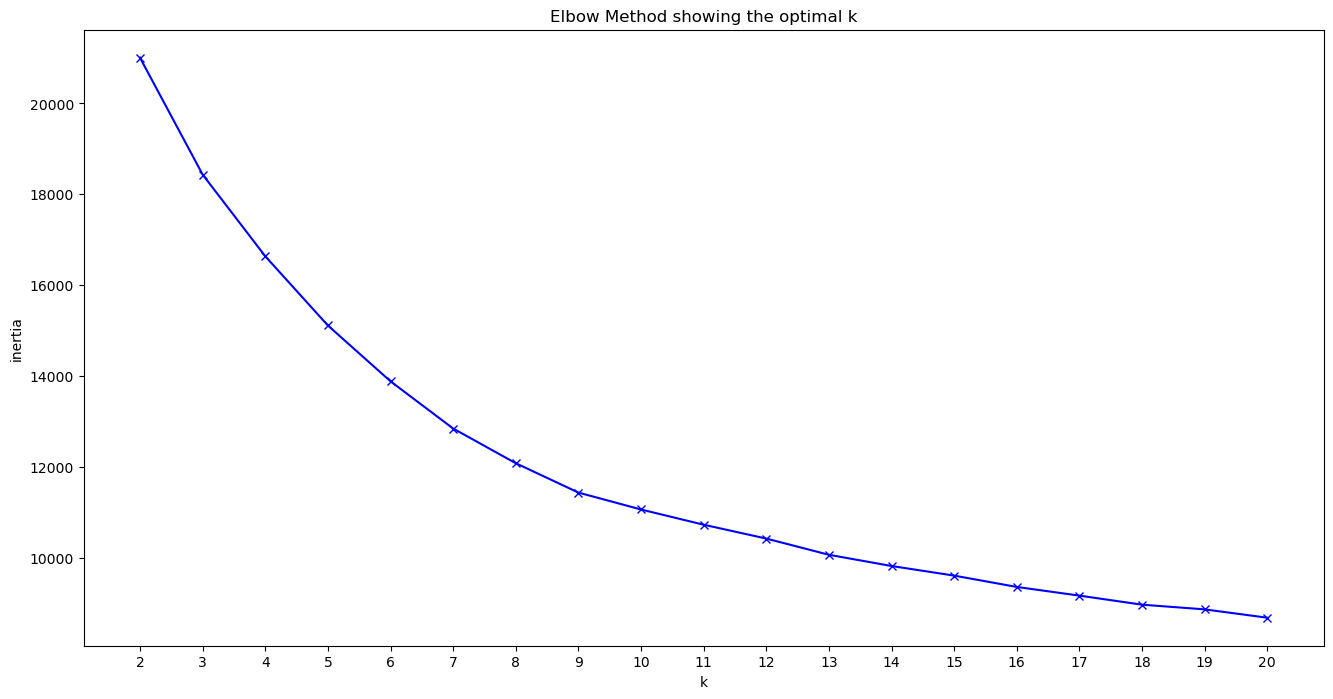

In [170]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df2_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

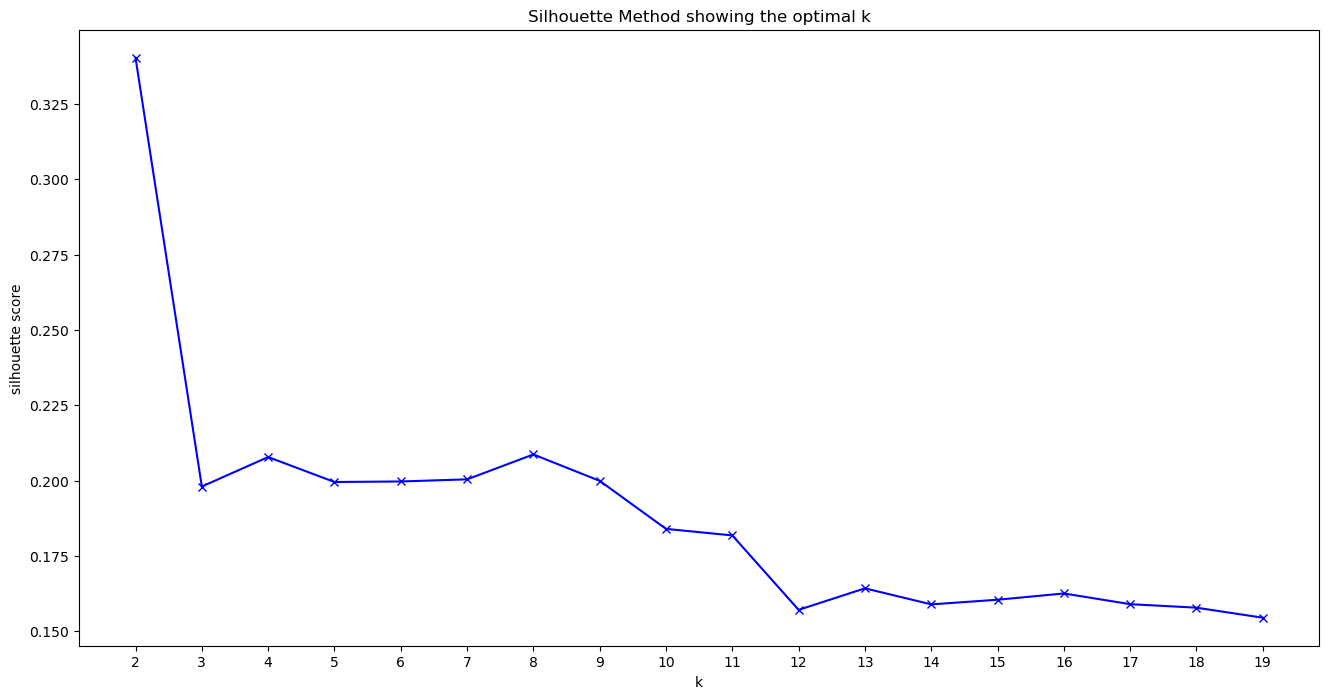

In [174]:
from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df2_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(df2_scaled_df, kmeans.predict(df2_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [175]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(df2_scaled_df) # 

KMeans(n_clusters=9, random_state=1234)

In [176]:
labels = kmeans.labels_

In [177]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [179]:
clusters = kmeans.predict(df2_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    250
1    463
2    259
3    389
4    245
5    175
6    341
7    690
8    139
dtype: int64

In [180]:
clusters

array([3, 3, 3, ..., 2, 2, 2])

In [181]:
df["cluster"] = clusters
df

danceability  energy  loudness  speechiness  acousticness  \
0            0.542   0.905    -5.653       0.0540      0.001720   
1            0.643   0.849    -5.428       0.0526      0.037100   
2            0.579   0.558    -6.986       0.0895      0.020200   
3            0.489   0.649    -5.110       0.0336      0.000603   
4            0.426   0.888    -3.720       0.0987      0.000455   
...            ...     ...       ...          ...           ...   
2946         0.744   0.141   -19.627       0.0603      0.469000   
2947         0.792   0.342   -12.032       0.0329      0.088600   
2948         0.661   0.209   -19.632       0.0398      0.434000   
2949         0.560   0.359   -14.593       0.0288      0.061700   
2950         0.755   0.220   -15.257       0.2360      0.181000   

      instrumentalness  liveness  valence    tempo                      id  \
0             0.010400     0.136   0.3740  153.398  5A1FmxbYVRZKy4nc16MAue   
1             0.000000     0.058   0.9030  162.152  6GG73Jik4jUlQCkKg9JuGO   
2             0.000001     0.212   0.5060  179.949  7nzsY8vlnKdvGOEE0rjAXZ   
3             0.713000     0.101   0.7700  158.009  57Xjny5yNzAcsxnusKmAfA   
4             0.000000     0.306   0.3870  144.111  0M3adYbGtyRHACP86dey1H   
...                ...       ...      ...      ...                     ...   
2946          0.863000     0.111   0.3700  112.294  0pIdMLYe4ptCYafCMIeSjS   
2947          0.822000     0.128   0.3340  110.016  4gRh7l16lZTdaAAGqDhrC5   
2948          0.892000     0.131   0.2680  110.000  0bEixfuWUAwzt6Khi1ccgn   
2949          0.858000     0.151   0.0376  100.021  5aIpECieH9BYbLdUt6iJI4   
2950          0.894000     0.107   0.5540  170.071  1qfKWLhAOL9PBvZ5wsOhsU   

      duration_ms  cluster  
0          203347        3  
1          165853        3  
2          207357        3  
3          219827        3  
4          191520        3  
...           ...      ...  
2946       148071        2  
2947       161591        2  
2948       179591        2  
2949       201750        2  
2950       127235        2  

[2951 rows x 12 columns]

In [ ]:
#input function user song
#gettin the audio feature if it not hot 
#scale the audio feature 
#predict the cluster 
#recomend a song of the cluster with a saple function 

In [182]:
user_input= input ("Please type the name of the song: ")

Please type the name of the song: Flowers 


In [183]:
results = sp.search(q= user_input,limit=1,market="GB")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Flowers+&type=track&market=GB&offset=0&limit=1',
  'items': [{'album': {'album_group': 'single',
     'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YGY8feqx7naU7z4HrwZM6'},
       'href': 'https://api.spotify.com/v1/artists/5YGY8feqx7naU7z4HrwZM6',
       'id': '5YGY8feqx7naU7z4HrwZM6',
       'name': 'Miley Cyrus',
       'type': 'artist',
       'uri': 'spotify:artist:5YGY8feqx7naU7z4HrwZM6'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/7I0tjwFtxUwBC1vgyeMAax'},
     'href': 'https://api.spotify.com/v1/albums/7I0tjwFtxUwBC1vgyeMAax',
     'id': '7I0tjwFtxUwBC1vgyeMAax',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273f429549123dbe8552764ba1d',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02f429549123dbe8552764ba1d',
       'width': 300},
      {'height':

In [187]:
results["tracks"]["items"][0]["id"]

'0yLdNVWF3Srea0uzk55zFn'

In [190]:
#gettin the audio feature if it not hot 

af =sp.audio_features(results["tracks"]["items"][0]["id"] )

In [197]:
af = pd.DataFrame(af)

In [200]:
af= af[df2_scaled_df.columns]

In [201]:
af

danceability  energy  loudness  speechiness  acousticness  \
0         0.707   0.681    -4.325       0.0668        0.0632   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000005    0.0322    0.646  117.999       200455

In [194]:
scaler.fit(df2_scaled_df)

StandardScaler()

In [204]:
#scale the audio feature 

scaler = StandardScaler()
scaler.fit(af)
af_scaled = scaler.transform(af)
af_scaled_df = pd.DataFrame(af_scaled, columns = af.columns)
display(af.head())
print()
display(af_scaled_df.head())


danceability  energy  loudness  speechiness  acousticness  \
0         0.707   0.681    -4.325       0.0668        0.0632   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000005    0.0322    0.646  117.999       200455

danceability  energy  loudness  speechiness  acousticness  \
0           0.0     0.0       0.0          0.0           0.0   

   instrumentalness  liveness  valence  tempo  duration_ms  
0               0.0       0.0      0.0    0.0          0.0

In [ ]:
#predict the cluster 
#recomend a song of the cluster with a saple function 